In [1]:
# !conda install -p c:\Users\txbat\Documents\S7_2024_Fall\CSCE_435\Project_2024\.conda ipykernel --update-deps --force-reinstall

!pip install llnl-thicket

  Using cached llnl_thicket-2024.1.0-py3-none-any.whl.metadata (3.8 kB)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\txbat\AppData\Roaming\Python\Python38\site-packages\pip\_vendor\packaging\v

  Using cached llnl_hatchet-2024.1.2-cp38-cp38-win_amd64.whl
Using cached llnl_thicket-2024.1.0-py3-none-any.whl (277 kB)


In [2]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

Read all files

In [3]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("caliper_files/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 201/201 [00:01<00:00, 133.69it/s]


View Calltree

In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.004 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
2.750 main
├─ 0.282 MPI_Barrier
├─ 2.388 comm
│  ├─ 1.762 comm_large
│  │  ├─ 0.159 MPI_Recv
│  │  └─ 1.595 MPI_Send
│  └─ 0.625 comm_small
│     └─ 0.624 MPI_Scatter
├─ 0.050 comp
│  ├─ 0.028 comp_large
│  └─ 0.022 comp_small
├─ 0.004 correctness_check
│  ├─ 0.002 MPI_Allreduce
│  ├─ 0.000 MPI_Recv
│  └─ 0.000 MPI_Send
└─ 0.026 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 2.75 indices: {'profile': 20272383})
█ 2.48 - 2.75
█ 1.93 - 2.48
█ 1.38 - 1.93
█ 0.83 - 1.38
█ 0.28 - 0.83
█ 0.00 - 0.28

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs")

tk.metadata_column_to_perfdata("input_type")

tk.metadata_column_to_perfdata("input_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "input_size", "input_type", "num_procs" ]).sort_index()

tk.dataframe.head()

profile  \
node                                         input_size input_type num_procs               
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          3739233504   
                                                                   4           240462487   
                                                                   8          1462294724   
                                                                   16         3427913550   
                                                                   32         1372484201   

                                                                               nid  \
node                                         input_size input_type num_procs         
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          24.0   
                                                                   4          24.0   
                                                                   8          24.0   
                                                                   16         24.0   
                                                                   32         24.0   

                                                                               spot.channel  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          regionprofile   
                                                                   4          regionprofile   
                                                                   8          regionprofile   
                                                                   16         regionprofile   
                                                                   32         regionprofile   

                                                                              Min time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000520   
                                                                   8               0.000122   
                                                                   16              0.000567   
                                                                   32              0.000254   

                                                                              Max time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000534   
                                                                   8               0.000160   
                                                                   16              0.000615   
                                                                   32              0.000426   

                                                                              Avg time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000527   
                                                                   8               0.000142   
                                                                   16              0.000590   
                                                                   32              0.000324   

                                                                              Total time  \
node                                         input_size input_type num_procs 

In [6]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [18, 20, 22, 24, 26, 28]
input_types = ["sorted", "random", "perturbed"]

In [16]:
# Change font size for all plots
plt.rcParams.update({"font.size": 10})

saving at:  main_18.png


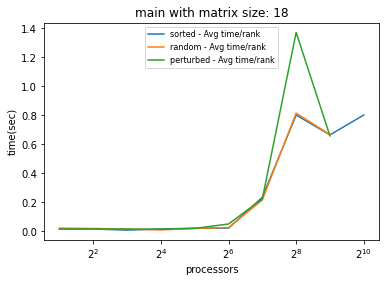

saving at:  main_20.png


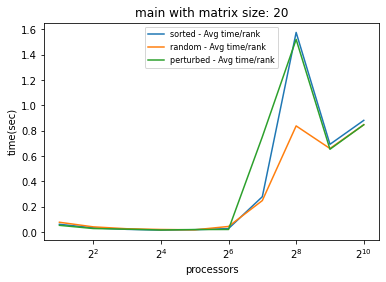

saving at:  main_22.png


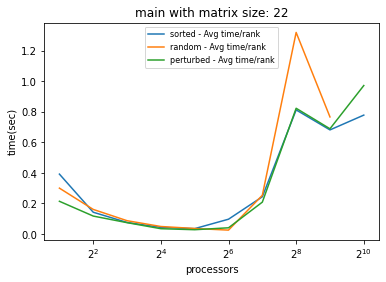

saving at:  main_24.png


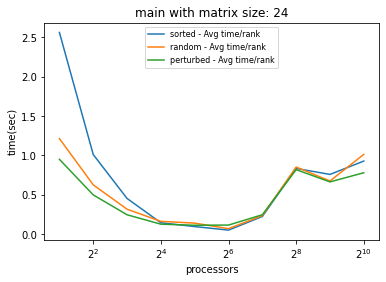

saving at:  main_26.png


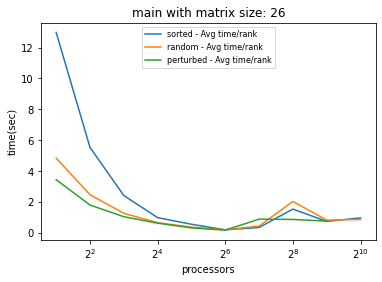

saving at:  main_28.png


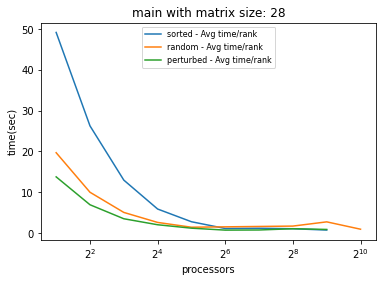

saving at:  comm_18.png


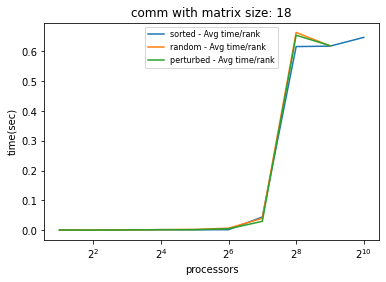

saving at:  comm_20.png


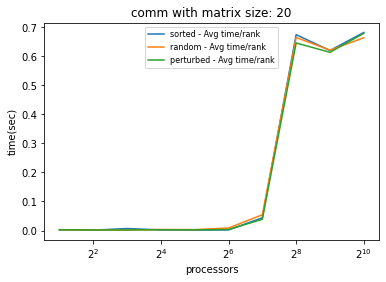

saving at:  comm_22.png


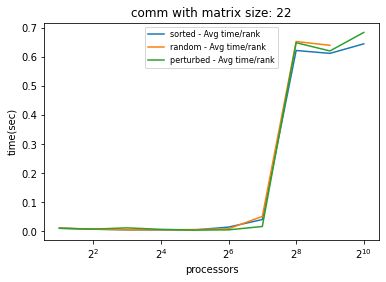

saving at:  comm_24.png


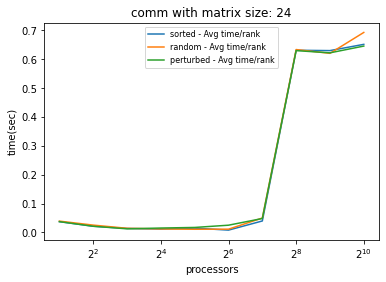

saving at:  comm_26.png


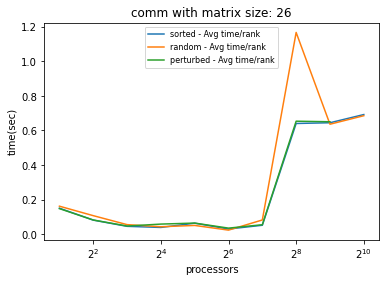

saving at:  comm_28.png


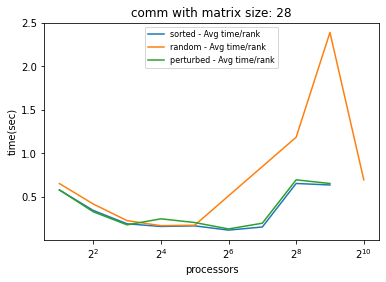

saving at:  comm_large_18.png


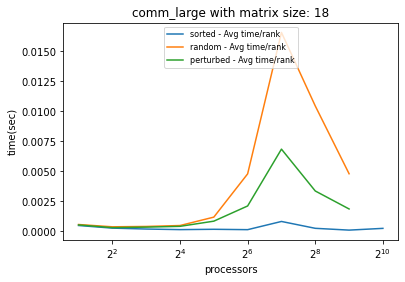

saving at:  comm_large_20.png


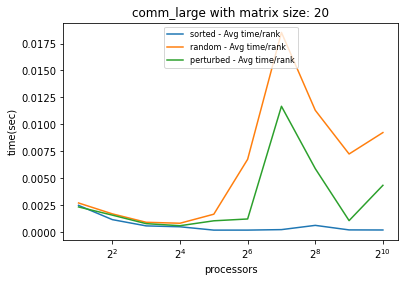

saving at:  comm_large_22.png


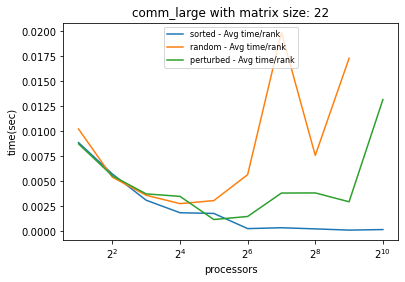

saving at:  comm_large_24.png


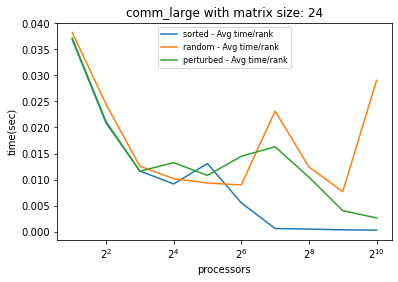

saving at:  comm_large_26.png


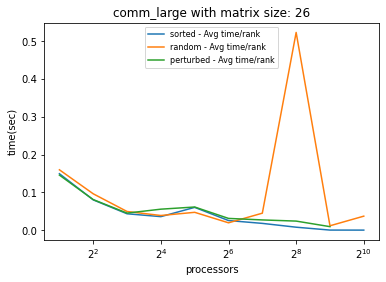

saving at:  comm_large_28.png


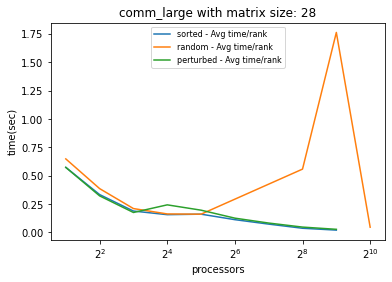

saving at:  comm_small_18.png


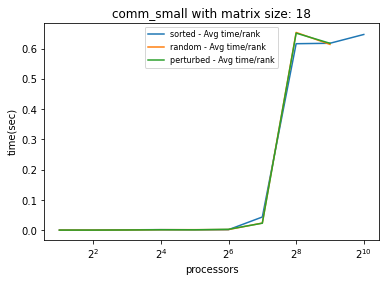

saving at:  comm_small_20.png


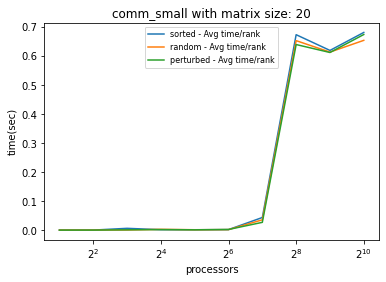

saving at:  comm_small_22.png


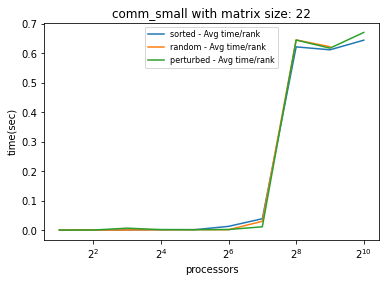

saving at:  comm_small_24.png


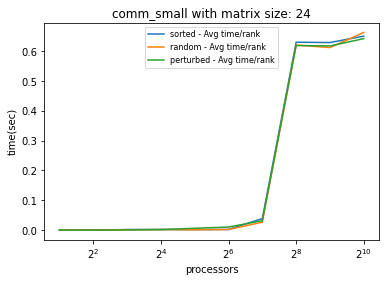

saving at:  comm_small_26.png


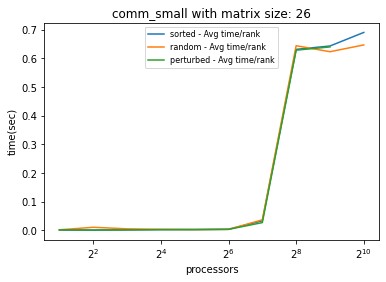

saving at:  comm_small_28.png


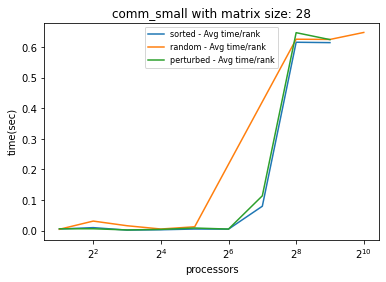

saving at:  comp_18.png


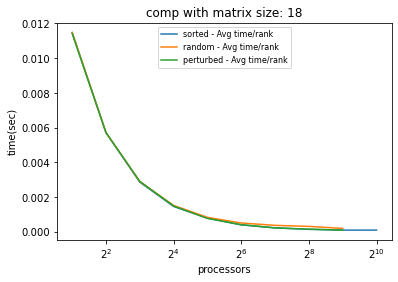

saving at:  comp_20.png


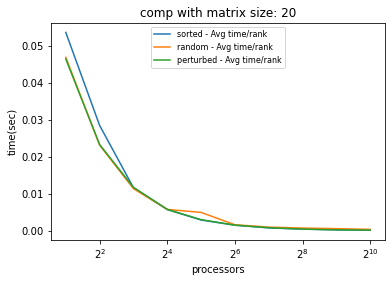

saving at:  comp_22.png


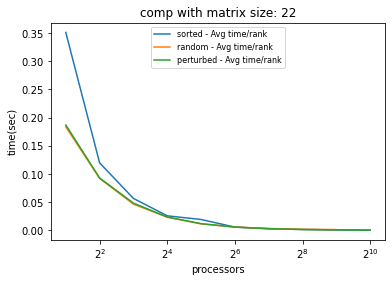

saving at:  comp_24.png


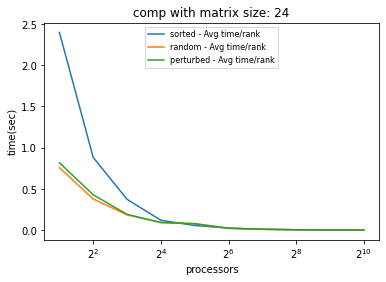

saving at:  comp_26.png


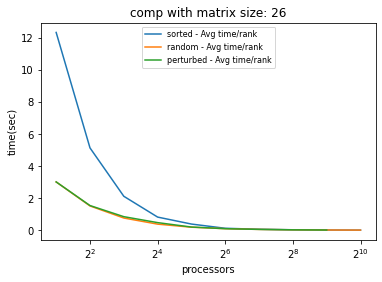

saving at:  comp_28.png


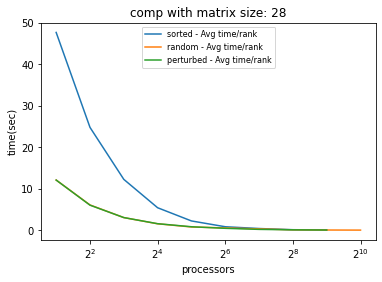

saving at:  comp_large_18.png


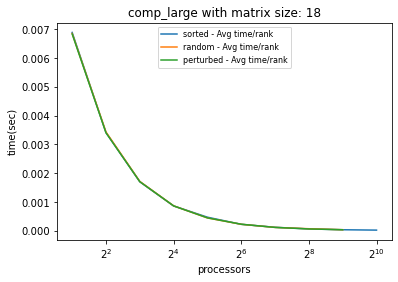

saving at:  comp_large_20.png


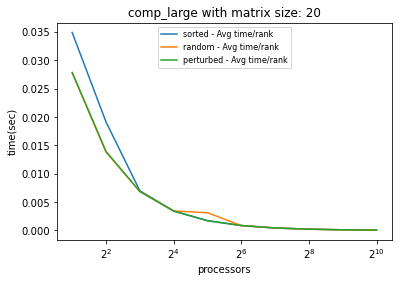

saving at:  comp_large_22.png


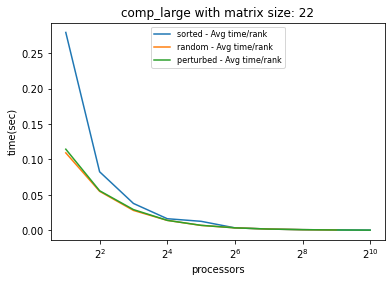

saving at:  comp_large_24.png


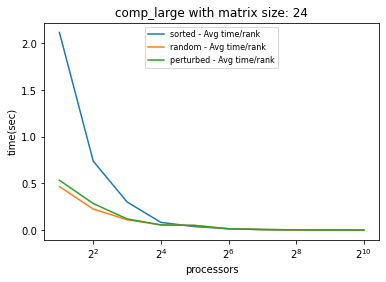

saving at:  comp_large_26.png


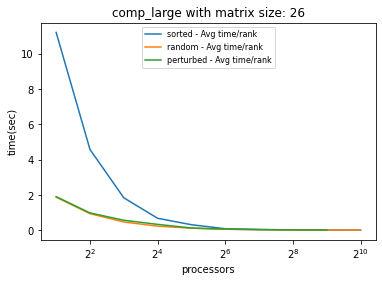

saving at:  comp_large_28.png


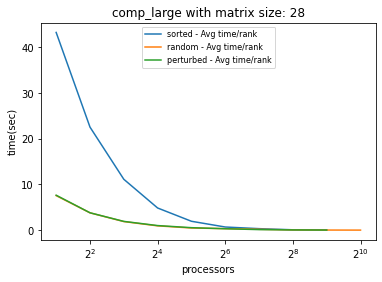

saving at:  comp_small_18.png


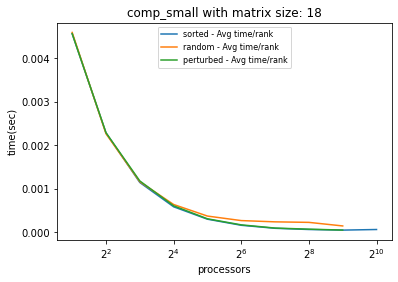

saving at:  comp_small_20.png


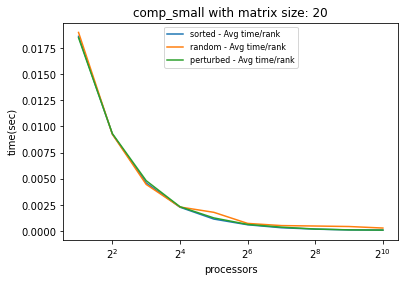

saving at:  comp_small_22.png


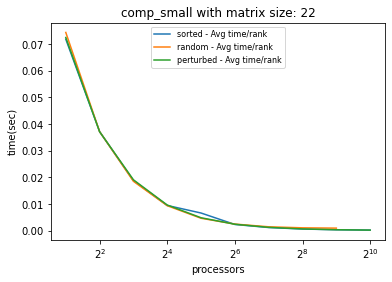

saving at:  comp_small_24.png


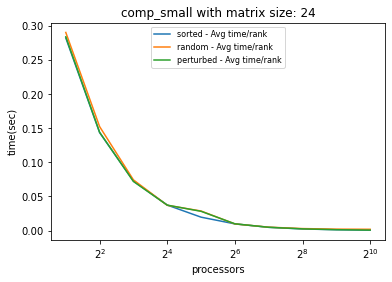

saving at:  comp_small_26.png


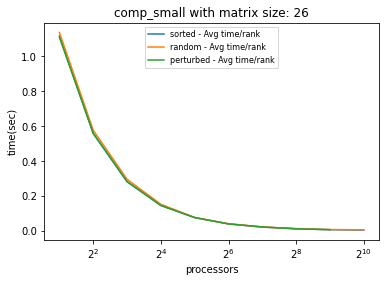

saving at:  comp_small_28.png


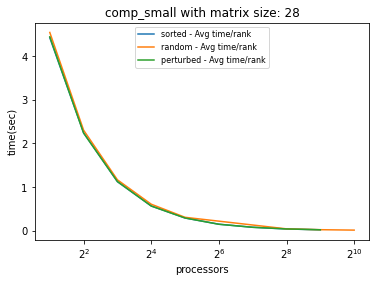

saving at:  correctness_check_18.png


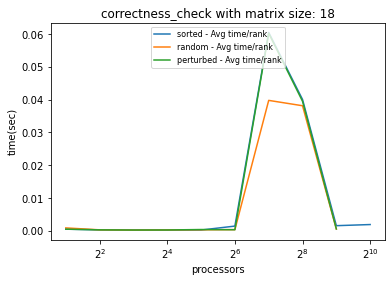

saving at:  correctness_check_20.png


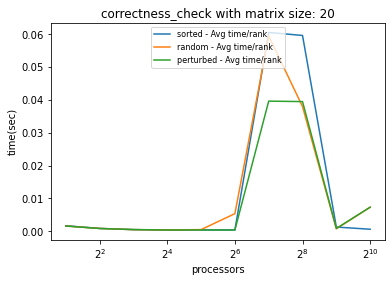

saving at:  correctness_check_22.png


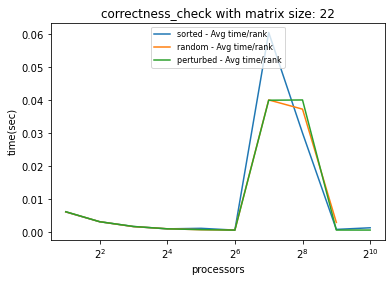

saving at:  correctness_check_24.png


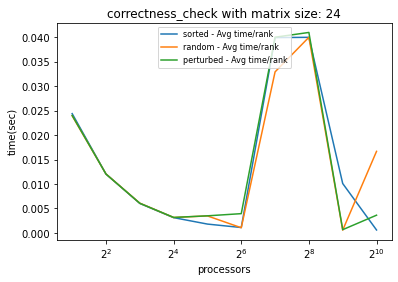

saving at:  correctness_check_26.png


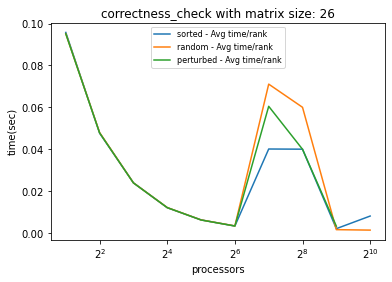

saving at:  correctness_check_28.png


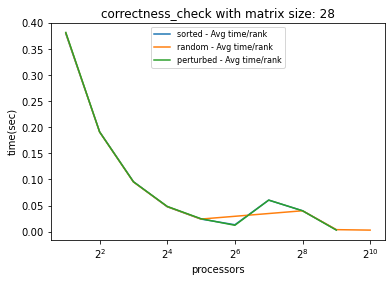

saving at:  data_init_runtime_18.png


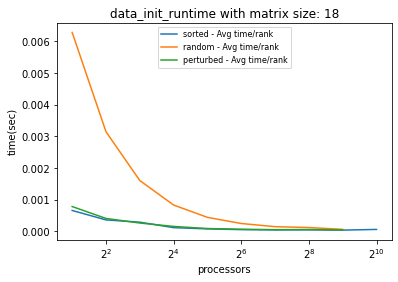

saving at:  data_init_runtime_20.png


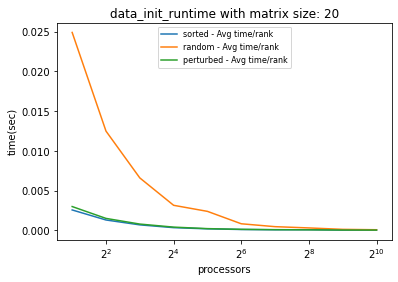

saving at:  data_init_runtime_22.png


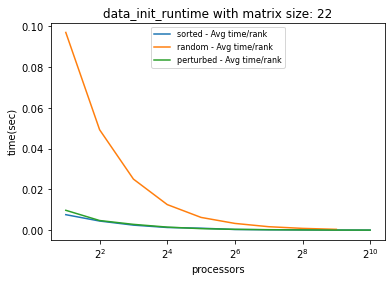

saving at:  data_init_runtime_24.png


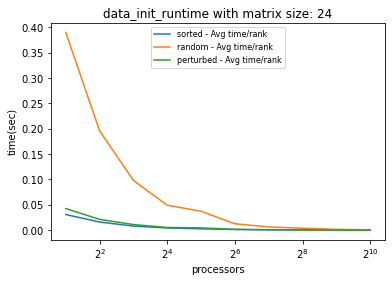

saving at:  data_init_runtime_26.png


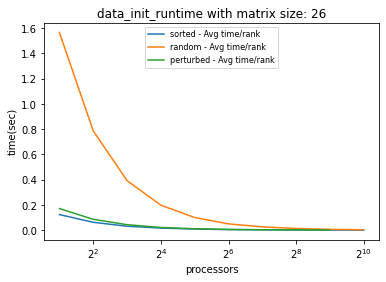

saving at:  data_init_runtime_28.png


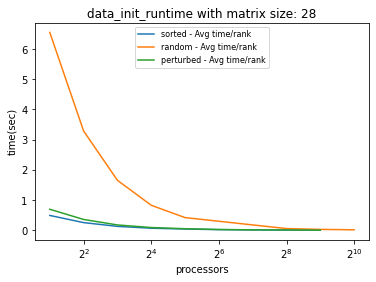

In [24]:
cont = True
for node in tk.graph.traverse():
    if("MPI" in node.frame["name"]):
        continue
    if( node.frame["name"] == "main"):
        cont = False
    if(cont):
        continue
    
    df = tk.dataframe.loc[node, ["Avg time/rank"]]
    #print(node.frame["name"])
    for mat_size in input_sizes:
        #print(df.head())
        #print(df.loc[2**mat_size,"sorted"])
        #print("sorted",df.sorted)
        #print(df.loc[2**mat_size,["Min time/rank","Max time/rank","Avg time/rank"]])
        for in_type in input_types:
            plt.plot(df.loc[2**mat_size,in_type])
            plt.ylabel("time(sec)")
            plt.xlabel("processors")
            plt.title(node.frame["name"] + " with matrix size: " + str(mat_size))
        
        plt.legend([input_types[0] + " - Avg time/rank",
                    input_types[1] + " - Avg time/rank",
                    input_types[2] + " - Avg time/rank"],
                    loc = "upper center",
                    fontsize = 8) 
        plt.xscale('log', base = 2)
        print("saving at: ",node.frame["name"] + "_" + str(mat_size)+".png")
        plt.savefig("graphs/"+node.frame["name"] + "_" + str(mat_size)+".png")
        plt.show()